In [49]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [82]:
root_path = os.path.join('..', '..', 'scraper', 'scraper_rooftops', 'scraped_data', 'reviews')
restaurants_ids = {
    'bokan': 1,
    'savage': 2,
    'aviary': 5,
    'radio': 6,
    'madison': 18
}

bokan = pd.read_json(os.path.join(root_path, 'reviews_id_' + str(restaurants_ids['bokan']) + '.json'), lines=True)
savage = pd.read_json(os.path.join(root_path, 'reviews_id_' + str(restaurants_ids['savage']) + '.json'), lines=True)
aviary = pd.read_json(os.path.join(root_path, 'reviews_id_' + str(restaurants_ids['aviary']) + '.json'), lines=True)
madison = pd.read_json(os.path.join(root_path, 'reviews_id_' + str(restaurants_ids['madison']) + '.json'), lines=True)
radio = pd.read_json(os.path.join(root_path, 'reviews_id_' + str(restaurants_ids['radio']) + '.json'), lines=True)

bokan.set_index(['review_id'], inplace=True)
savage.set_index(['review_id'], inplace=True)
aviary.set_index(['review_id'], inplace=True)
madison.set_index(['review_id'], inplace=True)
radio.set_index(['review_id'], inplace=True)

bokan['date_of_review'] = pd.to_datetime(bokan['date_of_review'])
savage['date_of_review'] = pd.to_datetime(savage['date_of_review'])
aviary['date_of_review'] = pd.to_datetime(aviary['date_of_review'])
madison['date_of_review'] = pd.to_datetime(savage_gardens['date_of_review'])
radio['date_of_review'] = pd.to_datetime(radio['date_of_review'])

In [83]:
def avg_and_count(df):

    df_avg = df.groupby(pd.Grouper(key='date_of_review', freq='M')).mean()
    df_avg = df_avg[['rating']]

    df_sum = df.groupby(pd.Grouper(key='date_of_review', freq='M')).count()
    df_sum = df_sum[['title']]
    df_sum.rename({'title': 'nb_reviews'}, axis=1, inplace=True)

    df_ratings = df_avg.merge(df_sum, left_index=True, right_index=True)
    return df_ratings

bokan_ratings = avg_and_count(bokan)
savage_ratings = avg_and_count(savage)
aviary_ratings = avg_and_count(aviary)
madison_ratings = avg_and_count(madison)
radio_ratings = avg_and_count(radio)

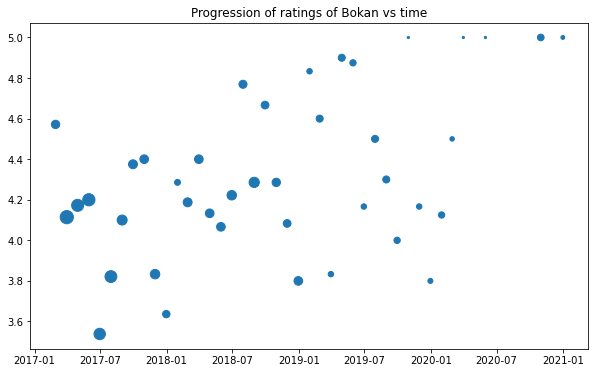

In [89]:
def plot_ratings_vs_time(df_ratings, name_restaurant):
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df_ratings.index, df_ratings.rating, sizes=df_ratings.nb_reviews * 5)
    plt.title(f'Progression of ratings of {name_restaurant} vs time')
    
    df_ratings_reg = df_ratings.dropna(subset=['rating'])
    plt.show()
    
plot_ratings_vs_time(bokan_ratings, 'Bokan')

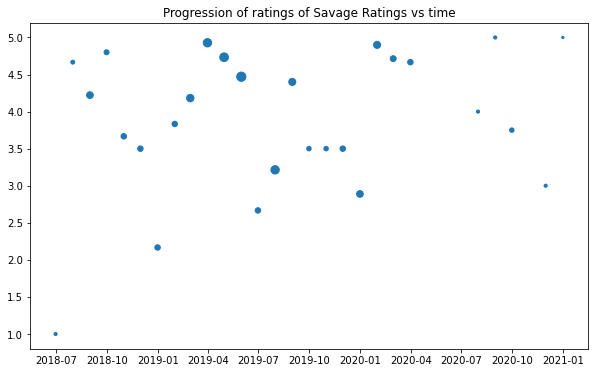

In [85]:
plot_ratings_vs_time(savage_ratings, 'Savage Ratings')

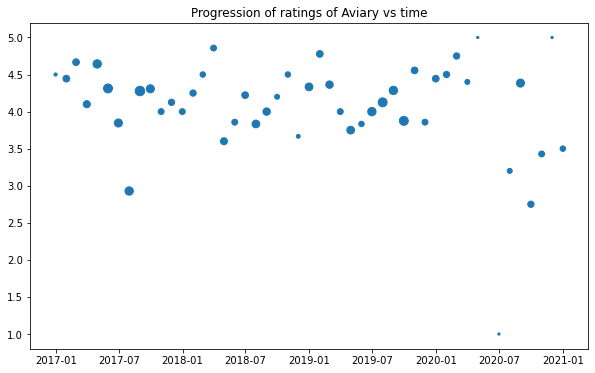

In [86]:
plot_ratings_vs_time(aviary_ratings, 'Aviary')

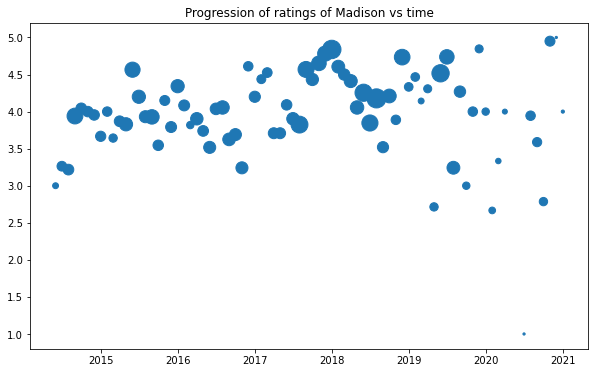

In [87]:
plot_ratings_vs_time(madison_ratings, 'Madison')

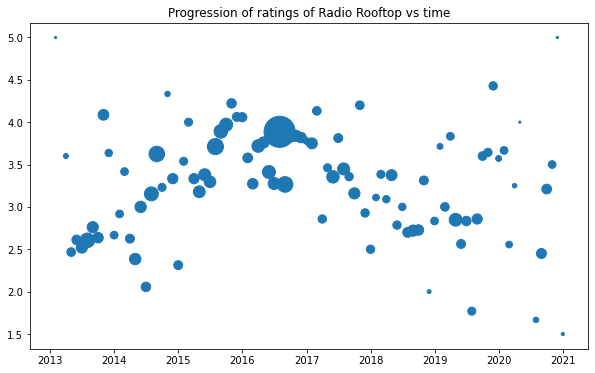

In [88]:
plot_ratings_vs_time(radio_ratings, 'Radio Rooftop')